In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')

Populating the interactive namespace from numpy and matplotlib


**1.  Постройте разностные односторонние производные, аппроксимирующие u′(x) на нерав - номерной сетке $\overline{\omega} = \{x_i, i=\overline{0,N}, x_0 = 0, x_N = 1\}$**
 
Построим разностную аппроксимацию дифференуиального оператора 
$L[u] =\frac{du}{dx}$ на неравномерной сетке:
- правой односторонней производной: 
$L_{i}^{+}[u] = \frac{u(x_{i+1}) - u(x_i)}{x_{i+1} - x_i} = L[u] + O(x^1)$
- левой односторонней производной:
$L_{i}^{-}[u] = \frac{u(x_{i}) - u(x_{i-1})}{x_{i} - x_{i-1}} = L[u] + O(x^1)$

----------

**2.  Постройте разностную аппроксимацию второй производной $u''(x)$ на неравномерной сетке $\overline{\omega} = \{x_i, i=\overline{0,N}, x_0 = 0, x_N = 1\}$**
 
Построим разностную аппроксимацию дифференуиального оператора 
$L[u] =\frac{d^2u}{dx^2}$ на неравномерной сетке:

$u(x_{i+1}) = u(x_i) + (x_{i+1} - x_i)u'(x) + 0.5(x_{i+1} - x_i)^2u''(x) + O(x^3)$

$u(x_{i-1}) = u(x_i) + (x_{i} - x_{i-1})u'(x) + 0.5(x_{i} - x_{i-1})^2u''(x) + O(x^3)$

тогда, сложив первое и второе выражения и считая что соседние узлы сетки расположены не сильно далеко друг от друга, т.е. $h_i := x_{i} - x_{i-1} \approx x_{i+1} - x_{i}$  получим:
$L_i[u] =  \frac{u(x_{i+1}) - 2u(x_i) + u(x_{i-1})}{h_i^2} = L[u] + O(x^2)$


-------

**3. Решите краевую задачу**
$$
\begin{cases}
   L[u] = \frac{d^2u}{dx^2} = -f(x), x \in (0, 1);
   \\
   \sigma_0 u'(0) + \gamma_0 u(0) = g_0;
   \\
   \sigma_1 u'(1) + \gamma_1 u(1) = g_1.
 \end{cases}
$$
**аналитически и численно с помощью разностной схемы на равномерной сетке, если:**
- a)$f=x+1,\sigma_0=1, \gamma_0=2, g_0 =0, \sigma_1 =1, \gamma_1 =0, g_1 =1;$
- г)$f=cos(\pi x),\sigma_0=0, \gamma_0=1, g_0 =2, \sigma_1 =1, \gamma_1 =0.5, g_1 =0;$

Сравните численное решение с аналитическим. Исследуйте зависимость погрешности решения от шага сетки.

------------

In [2]:
def progonka(coefs, F, kappa, mu, N):
    A, B, C  = coefs
    y = np.zeros((N, 1)) 
    alpha = np.zeros((N-1, 1))
    beta = np.zeros((N-1, 1))
    
    # прямой ход прогонки:
    alpha[0], beta[0] = kappa[0], mu[0]
    for n in range(1, N-1): 
        alpha[n] = B / (C - A*alpha[n-1])
        beta[n] = (A*beta[n-1] + F[n]) / (C - A*alpha[n-1])
    
    # обратный ход прогонки:
    y[-1] = (mu[1] + kappa[1]*beta[-2]) / (1 - kappa[1]*alpha[-2])
    for n in range(N-2, -1, -1):
        y[n] = alpha[n]*y[n+1] + beta[n];
    
    return y

In [3]:
def norma_l2(u, y, n):
    h = 1/n
    c = (u[0] - y[0])**2 + (u[-1] - y[-1])**2
    return ( c*h/2 + h*np.sum( (u[1:-1] - y[1:-1])**2 ) )**(1/2)


def get_results(coefs, kappa, mu, f, U, N, n_finish=106):
    x = np.linspace(0, 1, N)
    F = f(x, 1/N)
    u = U(x)
    kapa = kappa(1/N); muu = mu(1/N)
    y = progonka(coefs, F, kapa, muu, N)
    print(norma_l2(u, y, N))

    N1 = np.array([15, 30, 50, 60, 90, 120, 150, 200, 300, 500, 1000, 2000])
    eror = []
    for n in N1:
        _x = np.linspace(0, 1, n)
        F = f(_x, 1/n)
        _u = U(_x)
        kapa = kappa(1/n); muu = mu(1/n)
        _y = progonka(coefs, F, kapa, muu, n)
        eror.append(norma_l2(_u, _y, n))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))
    ax1.scatter(x, y, fc='none', ec='red', lw=1, label='Numerical decision')
    ax1.plot(x, u, '-o', label='Analitical decision')
    ax1.grid(); ax1.legend()
    ax1.set_xlabel('x'); ax1.set_ylabel('y')

    ax2.plot(1/N1, eror, '-o', label='Eror')
    ax2.grid(); ax2.legend()
    ax2.set_xlabel('h'); ax2.set_ylabel('eror')

    plt.show()

1. Условие (1): $f=x+1,\sigma_0=1, \gamma_0=2, g_0 =0, \sigma_1 =1, \gamma_1 =0, g_1 =1;$

[12.53613067]


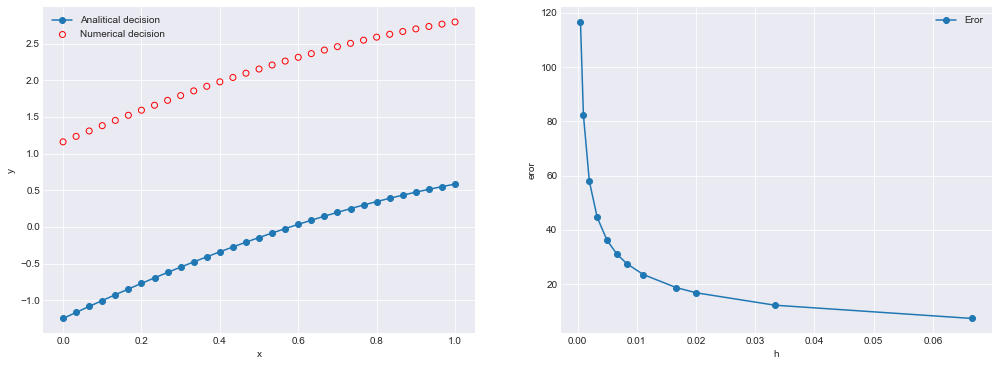

In [4]:
F = lambda x, h: (x + 1)*h**2
U = lambda x: -(x**3/6 + x**2/2 - 5*x/2 + 5/4)

# (alpha_0,  a_N)
kappa = lambda h: (1 / (1 + 2*h), 1.)
# (beta_0,  f_N)
mu = lambda h: (0., h)

coefs = A, B, C = 1, 1, 2

get_results(coefs, kappa, mu, F, U, N=31)

2. Условие (2): $f=cos(\pi x),\sigma_0=0, \gamma_0=1, g_0 =2, \sigma_1 =1, \gamma_1 =0.5, g_1 =0;$

[6.31860696]


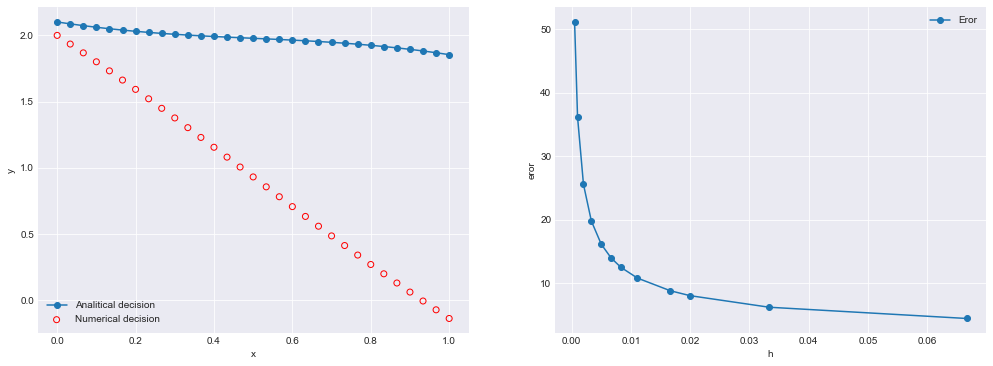

In [5]:
F = lambda x, h=0: np.cos(np.pi*x)*h**2
U = lambda x: -(np.cos(np.pi*x)/np.pi**2 + x/2*(1-1/np.pi**2) - 2*(1 + 1/np.pi**2))

# (alpha_0,  a_n)
kappa = lambda h: (0., 2.) 
# (beta_0,  f_N)
mu = lambda h: (2., 0.) 

coefs = A, B, C = 1, 1, 2

get_results(coefs, kappa, mu, F, U, N=31)

[1.78799874]


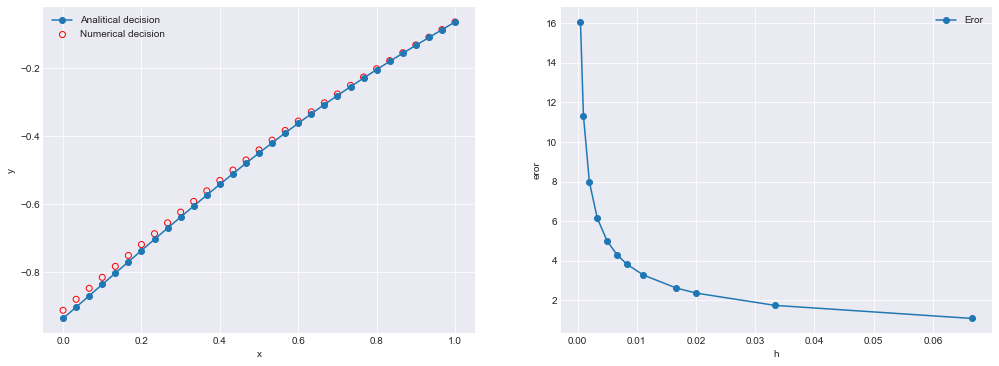

In [13]:
F = lambda x, h=0: h**2*x*np.sin(np.pi*x)
U = lambda x: x*np.sin(np.pi*x)/(np.pi**2)+2*np.cos(np.pi*x)/(np.pi**3)+x-1

# (alpha_0,  a_n)
kappa = lambda h: (1., 0.) 
# (beta_0,  f_N)
mu = lambda h: (-h, -2/np.pi**3) 

coefs = A, B, C = 1, 1, 2

get_results(coefs, kappa, mu, F, U, N=31)

In [7]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([4, 5, 6, 7, 8])

In [8]:
a - b

array([-3, -3, -3, -3, -3])

In [9]:
(np.sum((a[1:-1] - b[1:-1])**2))**(0.5)

5.196152422706632

In [37]:
N1 = np.array([15, 60, 90, 120, 150, 200, 300, 500, 1000, 2000])
eror = []
for n in N1:
    _x = np.linspace(0, 1, n)
    f = F(_x, 1/n)
    _u = U(_x)
    kapa = kappa(1/n); muu = mu(1/n)
    _y = progonka(coefs, f, kapa, muu, n)
    h = 1/n
    c = (_u[0] - _y[0])**2 + (_u[-1] - _y[-1])**2
    a =  ( c*h/2 + h*np.sum( (_u[1:-1] - _y[1:-1])**2 ) )**(1/2)
    eror.append(a)

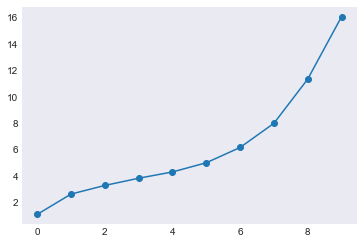

In [40]:
plt.plot(eror, '-o')

In [52]:
NN = 11
N = np.zeros(NN)

N[0] = 31
for j in range(1, NN):
    N[j] = 1 + 2*(N[j-1]-1)

h = np.zeros((NN,1))
norm_err = np.zeros((NN,1))
for j in range(NN):
    h[j] = 1/(N[j]-1)
    F = np.zeros(N[j],1)
    u = np.zeros(N[j],1)
    x = np.zeros(N[j],1)
    for n in range(1, N[j]):
        x[n] = (n-1)*h[j]
        F[n] = h[j]**2*x[n]*np.sin(np.pi*x[n])
        u[n] = x[n]*np.sin(np.pi*x[n])/(np.pi**2)+2*np.cos(np.pi*x[n])/(np.pi**3)+x[n]-1
    mu = [-h[j], -2/(np.pi**3)]
    Y = progonka((A,B,C),F,kappa,mu,N[j])
    s=((u[0]-Y[0])**2)*h[j]/2;
    for n in range(1, N[j]-1):
        s = s + ((u[n]-Y[n])**2)*h[j]
    s = s + ((u[j]-Y[j])**2)*h[j]/2
    norm_err[j] = np.sqrt(s);

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [48]:
N

array([[   31.],
       [   61.],
       [  121.],
       [  241.],
       [  481.],
       [  961.],
       [ 1921.],
       [ 3841.],
       [ 7681.],
       [15361.],
       [30721.]])